<a href="https://colab.research.google.com/github/Ruksar56/AMAZON_USER_SEGMENTATION/blob/main/K_Means_Clustering_Working_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering

## Importing libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [18]:
dataset = pd.read_csv('/content/Amazon dataset.csv')


In [19]:
dataset.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45


In [20]:
dataset.shape

(200, 5)

In [21]:
dataset.dtypes

Cus_ID     int64
Sex       object
Age        int64
Income     int64
Rating     int64
dtype: object

In [22]:
X = dataset.iloc[:, [3, 4]].values

In [23]:
print(X)

[[ 306555      44]
 [ 306555      91]
 [ 326992       7]
 [ 326992      87]
 [ 347429      45]
 [ 347429      86]
 [ 367866       7]
 [ 367866     106]
 [ 388303       4]
 [ 388303      81]
 [ 388303      16]
 [ 388303     111]
 [ 408740      17]
 [ 408740      87]
 [ 408740      15]
 [ 408740      89]
 [ 429177      40]
 [ 429177      74]
 [ 470051      33]
 [ 470051     110]
 [ 490488      40]
 [ 490488      82]
 [ 510925       6]
 [ 510925      82]
 [ 572236      16]
 [ 572236      92]
 [ 572236      36]
 [ 572236      69]
 [ 592673      35]
 [ 592673      98]
 [ 613110       5]
 [ 613110      82]
 [ 674421       5]
 [ 674421     104]
 [ 674421      16]
 [ 674421      91]
 [ 694858      20]
 [ 694858      82]
 [ 756169      30]
 [ 756169      84]
 [ 776606      40]
 [ 776606     104]
 [ 797043      41]
 [ 797043      69]
 [ 797043      32]
 [ 797043      73]
 [ 817480      62]
 [ 817480      53]
 [ 817480      48]
 [ 817480      48]
 [ 858354      59]
 [ 858354      68]
 [ 878791   

## Optimal number of clusters via Elbow Method

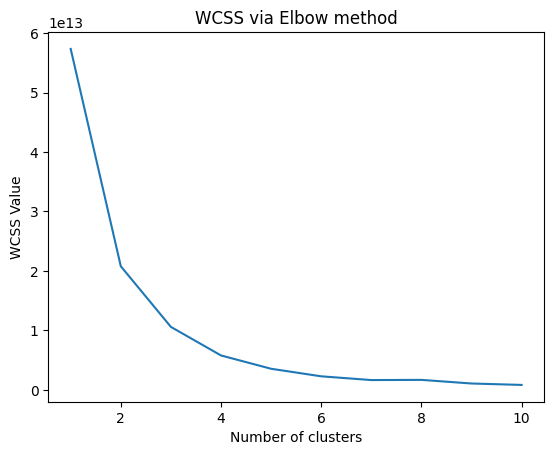

In [24]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init= 'k-means++',n_init='auto', random_state = 21)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')

plt.show()

## K Means Model Training on Training set

In [25]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',n_init='auto', random_state = 42)
y_means = kmeans.fit_predict(X)

In [26]:
print(y_means)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Visualizing Clusters

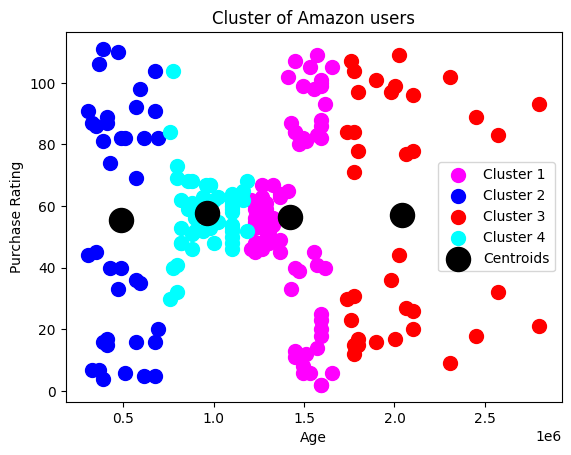

In [27]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Cluster of Amazon users')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')
plt.legend()
plt.show()